In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#Loading data from companies.txt & rounds2.csv to comapnies & rounds2 DataFrame
companies = pd.read_csv(r'C:\Users\ivy4165\Downloads\companies.txt',sep='\t',engine='python', encoding='palmos')
rounds2 = pd.read_csv(r'C:\Users\ivy4165\Downloads\rounds2.csv',engine='python', encoding='palmos')

In [2]:
print(companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None


In [3]:
print(rounds2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


In [4]:
# permalink & company_permalink are in differnet cases & changing it to lower case.
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [5]:
# number of unique companies in companies data frame
len(companies.permalink.unique())

66368

In [6]:
# number of unique companies in rounds2 dataframe
len(rounds2.company_permalink.unique())

66368

In [7]:
# Merging companies & rounds2 to master_frame where in common key values are company_permalink & permalink
master_frame=pd.merge(rounds2,companies,how="inner",left_on="company_permalink",right_on="permalink")
# to get the details of records in data Frame
print(master_frame.info())
# to determine how many %age of values in columns are nan/null
print(round(master_frame.isnull().sum() * 100 / len (master_frame.index ),2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
None
company_permalink           0.00

In [8]:
# to verify the same number of companies are present in both rounds2 & companies data frames.
print(master_frame['company_permalink'].describe())

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object


In [9]:
# dropping column funding_round_code as it is having 70% null values
master_frame = master_frame.drop('funding_round_code',axis=1)
print(round(master_frame.isnull().sum() * 100 / len (master_frame.index ),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


In [10]:
# Analysis of missing values in raised_amount_usd series of master_frame
print(master_frame['raised_amount_usd'].describe())

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64


In [11]:
# Big difference between min, max value & standard deviation is way too high to impute values in missing rows.
# removing all rows where in raised_amount_usd is nan
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [12]:
print(round(master_frame.isnull().sum() * 100 / len (master_frame.index ),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64


In [13]:
# removing all records where in category_list is missing because based on this it would be mapped to sectors.
master_frame = master_frame.loc[~pd.isnull(master_frame['category_list']),:]

In [14]:
print(round(master_frame.isnull().sum() * 100 / len (master_frame.index ),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.27
category_list               0.00
status                      0.00
country_code                5.73
state_code                  7.58
region                      7.00
city                        6.99
founded_at                 16.38
dtype: float64


In [15]:
# removing all records where country code is missing as we don't know which language they speak
master_frame = master_frame.loc[~(pd.isnull(master_frame['country_code']) & pd.isnull(master_frame['state_code']) & pd.isnull(master_frame['region']) & pd.isnull(master_frame['city'])),:]

In [16]:
print(round(master_frame.isnull().sum() * 100 / len (master_frame.index ),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64


In [17]:
# now the data is good for analysis getting the mean / median of investments across different funding types
# Using pivot_table to find out mean & median investment amount across different funding categories.
ftypemean = pd.pivot_table(master_frame,values='raised_amount_usd',columns='funding_round_type',aggfunc='mean').transpose()
print(ftypemean)

                       raised_amount_usd
funding_round_type                      
angel                       9.715739e+05
convertible_note            1.337187e+06
debt_financing              1.716765e+07
equity_crowdfunding         5.098980e+05
grant                       4.512698e+06
non_equity_assistance       4.807534e+05
post_ipo_debt               1.694518e+08
post_ipo_equity             6.607706e+07
private_equity              7.393849e+07
product_crowdfunding        1.353227e+06
secondary_market            8.443853e+07
seed                        7.477937e+05
undisclosed                 1.589166e+07
venture                     1.172422e+07


In [18]:
pd.pivot_table(master_frame,values='raised_amount_usd',columns='funding_round_type',aggfunc='median').transpose()

,raised_amount_usd
funding_round_type,
angel,414906.0
convertible_note,300000.0
debt_financing,1096653.0
equity_crowdfunding,85000.0
grant,225000.0
non_equity_assistance,60000.0
post_ipo_debt,19900000.0
post_ipo_equity,12262852.5
private_equity,20000000.0


In [19]:
# Within 5M - 15M USD venture type is the investment type.
# Pivoting across countries & funding type & summation of amount raised.
top9 = pd.pivot_table(master_frame,values='raised_amount_usd',columns='funding_round_type',index='country_code',aggfunc='sum')
# slicing the DataFrame to get top 9 countries for venture type fund investment.
top9 = pd.DataFrame(top9['venture']).sort_values(by='venture',ascending=False)[:9]
print(top9)

                   venture
country_code              
USA           4.200680e+11
CHN           3.933892e+10
GBR           2.007281e+10
IND           1.426151e+10
CAN           9.482218e+09
FRA           7.226851e+09
ISR           6.854350e+09
DEU           6.306922e+09
JPN           3.167647e+09


In [20]:
#top 3 english countries are USA,GBR & IND
# Extract the primary sector of each category list from the category_list column
master_frame['category_list'] = master_frame['category_list'].str.split('|').str[0]

In [21]:
#load the mapping.csv into data frame.
mappings=pd.read_csv('./mapping.csv')

In [22]:
#Creating an new data frame by merging master_frame with mapping.
master_frame_mapping=pd.merge(master_frame,mappings,how='inner',on='category_list')
print(master_frame_mapping.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82128 entries, 0 to 82127
Data columns (total 24 columns):
company_permalink                          82128 non-null object
funding_round_permalink                    82128 non-null object
funding_round_type                         82128 non-null object
funded_at                                  82128 non-null object
raised_amount_usd                          82128 non-null float64
permalink                                  82128 non-null object
name                                       82127 non-null object
homepage_url                               79034 non-null object
category_list                              82128 non-null object
status                                     82128 non-null object
country_code                               82128 non-null object
state_code                                 80537 non-null object
region                                     81004 non-null object
city                                       81

In [23]:
# Filtering the data for the top 3 countries for funding type = venture & investment range between 5 - 15 Million USD.
d1 = master_frame_mapping.loc[(master_frame_mapping['country_code'] == 'USA') & (master_frame_mapping['funding_round_type'] =='venture') & ((master_frame_mapping['raised_amount_usd'] >= 5000000) & (master_frame_mapping['raised_amount_usd'] <= 15000000)),:]
d2 = master_frame_mapping.loc[(master_frame_mapping['country_code'] == 'GBR') & (master_frame_mapping['funding_round_type'] =='venture') & ((master_frame_mapping['raised_amount_usd'] >= 5000000) & (master_frame_mapping['raised_amount_usd'] <= 15000000)),:]
d3 = master_frame_mapping.loc[(master_frame_mapping['country_code'] == 'IND') & (master_frame_mapping['funding_round_type'] =='venture') & ((master_frame_mapping['raised_amount_usd'] >= 5000000) & (master_frame_mapping['raised_amount_usd'] <= 15000000)),:]

In [24]:
# Re-arranging the data frame to have the main_category in columns.
d1 = pd.melt(d1, id_vars=['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],value_vars=['Automotive & Sports',
       'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

# filtering out teh un-wanted rows
d1 = d1.loc[(d1['value'] != 0),:]

# renaming the columns
d1 = d1.rename(columns={'category_list':'primary_category','variable':'main_category'})

In [25]:
# finding the total amount invested across main_category
d1 = d1.drop('value',axis=1)
additional_data1_1 = pd.pivot_table(d1,values='raised_amount_usd', columns='main_category',aggfunc='sum').transpose()
additional_data1_1 = additional_data1_1.rename(columns={'raised_amount_usd':'total'})

In [26]:
# finding the count of investement across main_category
additional_data1_2 = pd.pivot_table(d1,values='company_permalink', columns='main_category',aggfunc='count').transpose()
additional_data1_2 = additional_data1_2.rename(columns={'company_permalink':'count'})

In [27]:
# merging the sum to d1
d1 = pd.merge(d1,additional_data1_1,left_on='main_category',right_index=True)

In [28]:
# merging the count to d1
d1 = pd.merge(d1,additional_data1_2,left_on='main_category',right_index=True)

In [29]:
# Re-arranging the data frame to have the main_category in columns.
d2 = pd.melt(d2, id_vars=['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],value_vars=['Automotive & Sports',
       'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

# filtering out teh un-wanted rows
d2 = d2.loc[(d2['value'] != 0),:]

# renaming the columns
d2 = d2.rename(columns={'category_list':'primary_category','variable':'main_category'})

d2 = d2.drop('value',axis=1)

In [30]:
# finding the total amount invested across main_category
additional_data2_1 = pd.pivot_table(d2,values='raised_amount_usd', columns='main_category',aggfunc='sum').transpose()
additional_data2_1 = additional_data2_1.rename(columns={'raised_amount_usd':'total'})

In [31]:
# finding the count of investement across main_category
additional_data2_2 = pd.pivot_table(d2,values='company_permalink', columns='main_category',aggfunc='count').transpose()
additional_data2_2 = additional_data2_2.rename(columns={'company_permalink':'count'})

In [32]:
# merging the sum to d2
d2 = pd.merge(d2,additional_data2_1,left_on='main_category',right_index=True)

In [33]:
# merging the count to d2
d2 = pd.merge(d2,additional_data2_2,left_on='main_category',right_index=True)

In [34]:
# Re-arranging the data frame to have the main_category in columns.
d3 = pd.melt(d3, id_vars=['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],value_vars=['Automotive & Sports',
       'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

# filtering out teh un-wanted rows
d3 = d3.loc[(d3['value'] != 0),:]

# renaming the columns
d3 = d3.rename(columns={'category_list':'primary_category','variable':'main_category'})

d3 = d3.drop('value',axis=1)

# finding the total amount invested across main_category
additional_data3_1 = pd.pivot_table(d3,values='raised_amount_usd', columns='main_category',aggfunc='sum').transpose()
additional_data3_1 = additional_data3_1.rename(columns={'raised_amount_usd':'total'})

# finding the count of investment across main_category
additional_data3_2 = pd.pivot_table(d3,values='company_permalink', columns='main_category',aggfunc='count').transpose()
additional_data3_2 = additional_data3_2.rename(columns={'company_permalink':'count'})

# merging the sum to d3
d3 = pd.merge(d3,additional_data3_1,left_on='main_category',right_index=True)
# merging the count to d3
d3 = pd.merge(d3,additional_data3_2,left_on='main_category',right_index=True)

In [35]:
g1df = pd.pivot_table(d1,values='company_permalink',columns='main_category',aggfunc='count').transpose().sort_values(by='company_permalink',ascending=False)
g1df = g1df.iloc[:3,:]
print(g1df)

                                         company_permalink
main_category                                             
Others                                                2923
Cleantech / Semiconductors                            2297
Social, Finance, Analytics, Advertising               1912


In [36]:
g2df=pd.pivot_table(d2,values='company_permalink',columns='main_category',aggfunc='count').transpose().sort_values(by='company_permalink',ascending=False)
g2df = g2df.iloc[:3,:]
print(g2df)

                                         company_permalink
main_category                                             
Others                                                 143
Cleantech / Semiconductors                             127
Social, Finance, Analytics, Advertising                 98


In [37]:
g3df = pd.pivot_table(d3,values='company_permalink',columns='main_category',aggfunc='count').transpose().sort_values(by='company_permalink',ascending=False)
g3df = g3df.iloc[:3,:]
print(g3df)

                            company_permalink
main_category                                
Others                                    109
News, Search and Messaging                 52
Entertainment                              33


In [38]:
d1['raised_amount_usd'].sum()

99661524549.0

In [39]:
d1['raised_amount_usd'].count()

11149

In [40]:
d2['raised_amount_usd'].sum()

5028704358.0

In [41]:
d2['raised_amount_usd'].count()

577

In [42]:
d3['raised_amount_usd'].sum()

2683537552.0

In [43]:
d3['raised_amount_usd'].count()

299

In [44]:
# top sector top company with highest investment
d1_comp = d1.loc[d1['main_category'] == 'Others',['company_permalink','raised_amount_usd']]
d1_comp.groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/virtustream,64300000.0
/organization/capella,54968051.0
/organization/airtight-networks,54201907.0
/organization/decarta,52100000.0
/organization/black-duck-software,51000000.0
/organization/approva,50100000.0
/organization/five9,49600000.0
/organization/bit9,48433533.0
/organization/aryaka-networks,48166500.0


In [45]:
# 2 top sector top company with highest investment
d1_comp1 = d1.loc[d1['main_category'] == 'Cleantech / Semiconductors',['company_permalink','raised_amount_usd']]
d1_comp1.groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/biodesix,75300000.0
/organization/tigo-energy,68739496.0
/organization/forsight-labs,61300001.0
/organization/rheonix,56124758.0
/organization/scienergy,55375423.0
/organization/alung-technologies,54110403.0
/organization/metabolon,52420551.0
/organization/stretch,52000000.0
/organization/irhythm,50500000.0


In [46]:
# top sector top company with highest investment
d2_comp = d2.loc[d2['main_category'] == 'Others',['company_permalink','raised_amount_usd']]
d2_comp.groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37000000.0
/organization/sensage,36250000.0
/organization/enigmatic,32500000.0
/organization/silverrail-technologies,29000000.0
/organization/opencloud,27972766.0
/organization/myoptique-group,27694613.0
/organization/notonthehighstreet,26900000.0
/organization/acs-clothing,26239014.0
/organization/tribold,26000000.0


In [47]:
# 2 top sector top company with highest investment
d2_comp1 = d2.loc[d2['main_category'] == 'Cleantech / Semiconductors',['company_permalink','raised_amount_usd']]
d2_comp1.groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/eusa-pharma,35600000.0
/organization/horizon-discovery,31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h,29132906.0
/organization/elixent,25000000.0
/organization/takeda-cambridge,22340000.0
/organization/immune-targeting-systems,20320961.0
/organization/plaxica,19940192.0
/organization/i2o-water,19491529.0
/organization/xention,19051289.0


In [48]:
# top sector top company with highest investment
d3_comp = d3.loc[d3['main_category'] == 'Others',['company_permalink','raised_amount_usd']]
d3_comp.groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39000000.0
/organization/myntra,38000000.0
/organization/commonfloor,32900000.0
/organization/pepperfry-com,28000000.0
/organization/itzcash-card-ltd,25000000.0
/organization/nxtgen-data-center-cloud-services,22300000.0
/organization/maharana-infrastructure-and-professional-services-private-limited-mips,21600000.0
/organization/caratlane,21000000.0
/organization/comat-technologies,21000000.0


In [49]:
# 2 top sector top company with highest investment
d3_comp = d3.loc[d3['main_category'] == 'News, Search and Messaging',['company_permalink','raised_amount_usd']]
d3_comp.groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33000000.0
/organization/imimobile,23000000.0
/organization/sms-gupshup,22000000.0
/organization/roadrunnr,21000000.0
/organization/hike,21000000.0
/organization/matrimony-com,20400000.0
/organization/guruji,15000000.0
/organization/mobile2win-india,15000000.0
/organization/bluestone-com,15000000.0


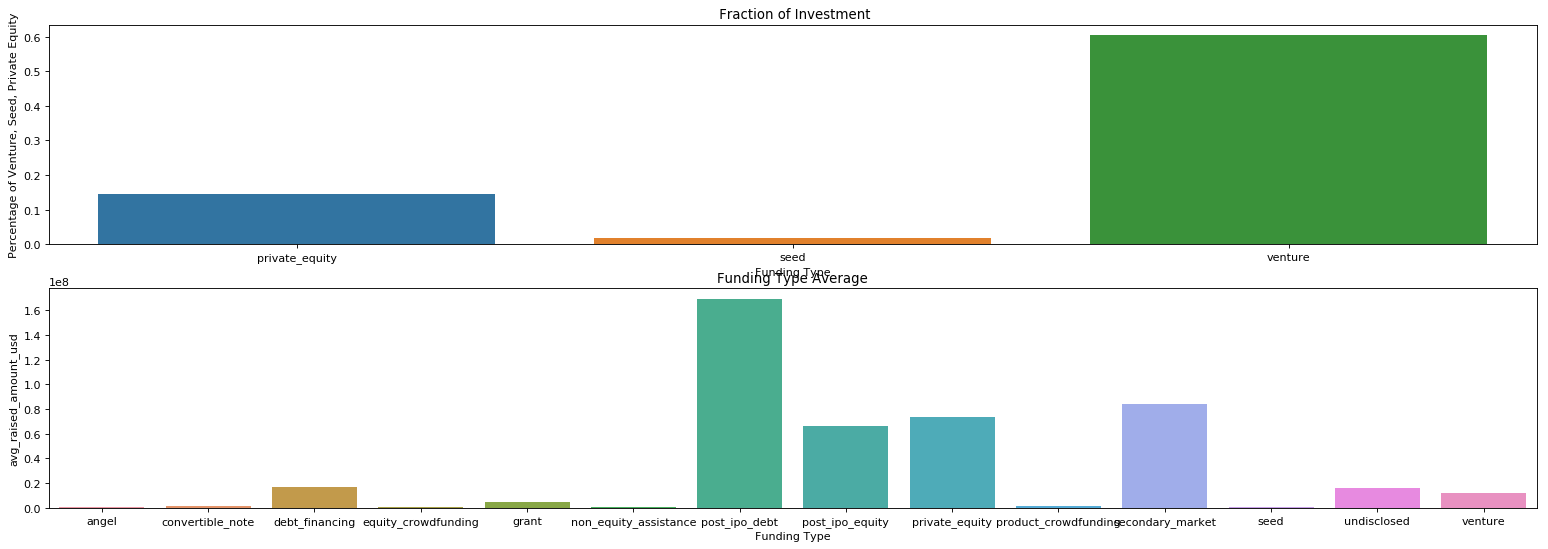

In [50]:
plot1 = master_frame.loc[((master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='private_equity') | (master_frame['funding_round_type']=='seed')),:]
total_investment = master_frame['raised_amount_usd'].sum()
plotting = plot1.groupby('funding_round_type').sum()
plotting['total'] = total_investment
plt.figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
sns.barplot(x=plotting.index.values, y=plotting['raised_amount_usd']/plotting['total'],data=plotting)
plt.xlabel('Funding Type')
plt.ylabel('Percentage of Venture, Seed, Private Equity')
plt.title(' Fraction of Investment')

plt.subplot(2,1,2)
sns.barplot(x=ftypemean.index.values, y=ftypemean['raised_amount_usd'],data=ftypemean)
plt.xlabel('Funding Type')
plt.ylabel('avg_raised_amount_usd')
plt.title('Funding Type Average')

plt.show()

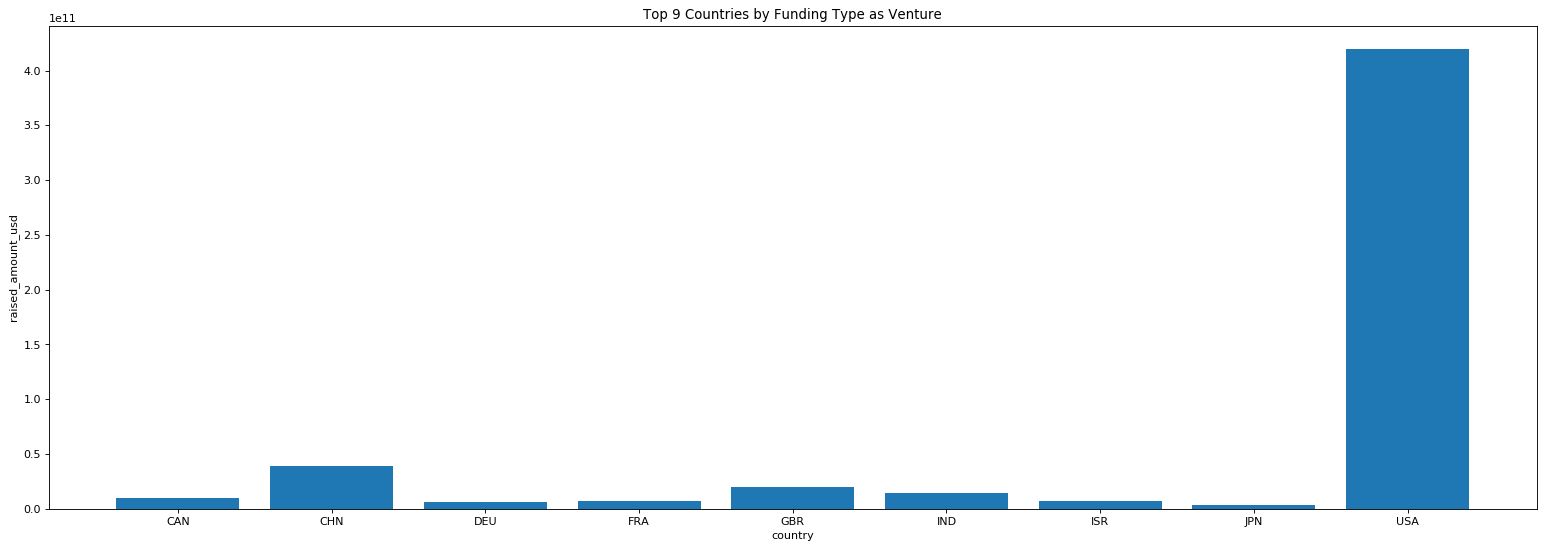

In [51]:
# plot showing the top 9 countries against the total amount of investments of funding type FT. 
plt.figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(top9.index.values,(top9['venture']))
plt.xlabel('country')
plt.ylabel('raised_amount_usd')
plt.title('Top 9 Countries by Funding Type as Venture')
plt.show()

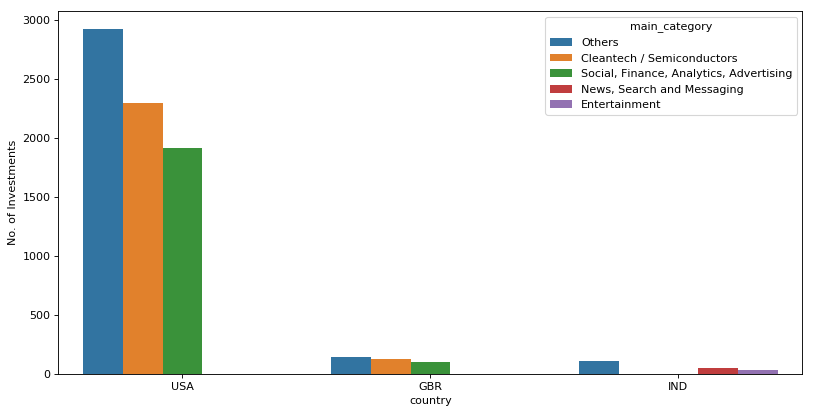

In [52]:
#plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
g1df['country'] = 'USA'
g2df['country'] = 'GBR'
g3df['country'] = 'IND'

gdf = pd.concat([g1df,g2df,g3df])
gdf = gdf.reset_index()

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='country', y='company_permalink', hue='main_category' ,data=gdf)
plt.ylabel('No. of Investments')
plt.show()